In [1]:
import sys
sys.path.append("..")

In [2]:
from conx import Network, Layer

Using Theano backend.


In [3]:
net = Network("MNIST")
net.add(Layer("input", shape=784, vshape=(28, 28), colormap="hot", minmax=(0,1)))
net.add(Layer("hidden1", shape=512, vshape=(16,32), activation='relu', dropout=0.2))
net.add(Layer("hidden2", shape=512, vshape=(16,32), activation='relu', dropout=0.2))
net.add(Layer("output", shape=10, activation='softmax'))

net.connect('input', 'hidden1')
net.connect('hidden1', 'hidden2')
net.connect('hidden2', 'output')

In [4]:
net

<Network name='MNIST'>

In [5]:
net.compile(loss='mean_squared_error',
            optimizer='sgd')

In [6]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

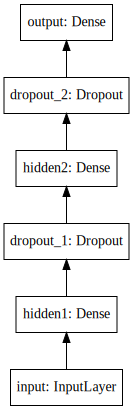

In [7]:
SVG(model_to_dot(net.model).create_svg())

In [8]:
net.load_keras_dataset('mnist')
net.rescale_inputs((0,255), (0,1), 'float32')
net.shuffle_dataset()
net.reshape_inputs(784)
net.split_dataset(100)
net.set_targets_to_categories(10)
net.summary_dataset()

Loading mnist dataset...
70000 train inputs, 0 test inputs
Set 70000 inputs and targets
Input data shape: (28, 28), range: (0, 255), type: uint8
No targets
Inputs rescaled to float32 values in the range 0 - 1
Shuffled all 70000 inputs
Input data shape: (784,), range: (0.0, 1.0), type: float32
Split dataset into:
   100 train inputs
   69900 test inputs
Generated 70000 target vectors from labels
100 train inputs, 69900 test inputs
Set 70000 inputs and targets
Input data shape: (784,), range: (0.0, 1.0), type: float32
Target data shape: (10,), range: (0, 0), type: uint8


In [9]:
net

<IPython.core.display.Javascript object>

In [ ]:
net.train(10)
#net.test()

In [8]:
import time
for i in range(10):
    net.propagate(net._get_input(i))
    time.sleep(1)

In [11]:
import numpy as np

In [20]:
net.propagate(np.ones(net.layers[0].shape) * 0.5)

[0.094483279,
 0.092372946,
 0.18054099,
 0.078582168,
 0.067566559,
 0.097670279,
 0.099990115,
 0.10438964,
 0.10446087,
 0.07994315]